In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import seaborn as sns
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.cluster import DBSCAN

In [ ]:
df = pd.read_csv('Mobile Price Prediction.csv', sep=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_id    161 non-null    int64 
 1   Price         161 non-null    int64 
 2   Sale          161 non-null    int64 
 3   weight        161 non-null    object
 4   resoloution   161 non-null    object
 5   ppi           161 non-null    int64 
 6   cpu core      161 non-null    int64 
 7   cpu freq      161 non-null    object
 8   internal mem  161 non-null    object
 9   ram           161 non-null    object
 10  RearCam       161 non-null    object
 11  Front_Cam     161 non-null    object
 12  battery       161 non-null    int64 
 13  thickness     161 non-null    object
dtypes: int64(6), object(8)
memory usage: 17.7+ KB


In [ ]:
for col in df.columns:
    try:
        df[col] = df[col].apply(lambda x: float(x.replace(",", ".")))
    except:
        pass

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df = df.drop(columns = 'product_id')

In [ ]:
x = df.drop(['price'], axis = 1)
y = df['price']

# Модель МНК


In [ ]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     256.2
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.74e-92
Time:                        17:23:27   Log-Likelihood:                -1049.6
No. Observations:                 161   AIC:                             2125.
Df Residuals:                     148   BIC:                             2165.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1749.5509    215.926      8.103   

### Получили множественную линейную регрессию с довольно высоким r^2

# Модель с обучающей и тестовой выборкой

In [ ]:
model = LinearRegression()

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [ ]:
x_train_st = scaler.fit_transform(x_train)

In [ ]:
results = model.fit(x_train_st, y_train)

In [ ]:
predictions_train = model.predict(x_train_st)

Обучающая выборка

In [ ]:
mse = mean_squared_error(y_train,predictions_train)
rmse = mean_squared_error(y_train,predictions_train, squared=False)
mae = mean_absolute_error(y_train,predictions_train)
mape = mean_absolute_percentage_error(y_train,predictions_train)
r2 = r2_score(y_train,predictions_train)

In [ ]:
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 27825.314612873393
Среднеквадратическая ошибка (RMSE): 166.80921621083587
Средняя абсолютная ошибка (MAE): 137.3993042905131
Средняя абсолютная ошибка  (MAPE): 0.07294497951459168
Коэффициент детерминации (R^2): 0.9533317918456903


Тестовая выборка

In [ ]:
x_test_st = scaler.transform(x_test)
predictions_test = model.predict(x_test_st)
mse = mean_squared_error(y_test,predictions_test)
rmse = mean_squared_error(y_test,predictions_test, squared=False)
mae = mean_absolute_error(y_test,predictions_test)
mape = mean_absolute_percentage_error(y_test,predictions_test)
r2 = r2_score(y_test,predictions_test)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 25256.565628429726
Среднеквадратическая ошибка (RMSE): 158.92314377846208
Средняя абсолютная ошибка (MAE): 135.19969481210828
Средняя абсолютная ошибка  (MAPE): 0.06151952428225449
Коэффициент детерминации (R^2): 0.9516554254110942


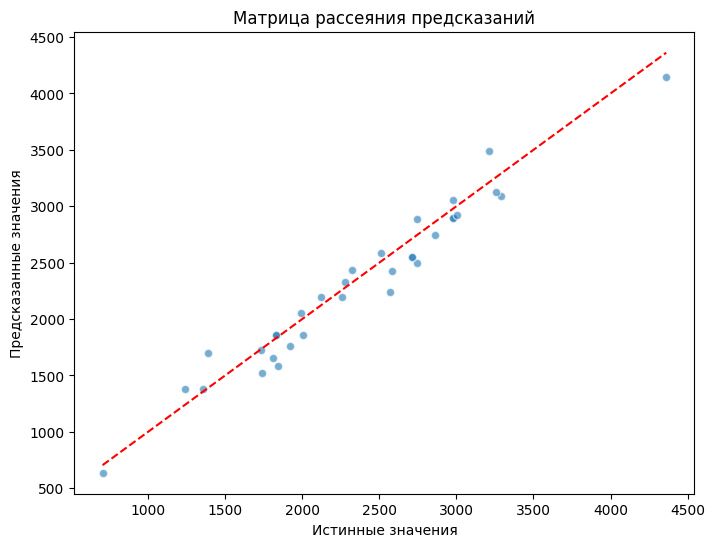

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, alpha=0.6, edgecolors='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Диагональ y = x')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Матрица рассеяния предсказаний')
plt.show()

# Модель с очисткой выбросов

In [ ]:
x_train['Y'] = y_train
q1 = x_train.quantile(0.25)
q3 = x_train.quantile(0.75)
iqr = q3 - q1
lower_edge = q1 - 3*iqr
upper_edge = q3 + 3*iqr
x_train =  x_train[(x_train >= lower_edge) & (x_train <= upper_edge)]
x_train.dropna(how = 'any', inplace = True)
y_train = x_train['Y']
x_train = x_train.drop('Y', axis = 1)
x_train.shape


(95, 13)

In [ ]:
x_test['Y'] = y_test
x_test =  x_test[(x_test >= lower_edge) & (x_test <= upper_edge)]
x_test.dropna(how = 'any', inplace = True)
y_test = x_test['Y']
x_test = x_test.drop('Y', axis = 1)
x_test.shape

(25, 13)

Обучающая выборка

In [ ]:
x_train_st = scaler.fit_transform(x_train)
results = model.fit(x_train_st, y_train)
predictions_train = model.predict(x_train_st)
r2_score(y_train,predictions_train )
mse = mean_squared_error(y_train,predictions_train)
rmse = mean_squared_error(y_train,predictions_train, squared=False)
mae = mean_absolute_error(y_train,predictions_train)
mape = mean_absolute_percentage_error(y_train,predictions_train)
r2 = r2_score(y_train,predictions_train)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 30217.204089956966
Среднеквадратическая ошибка (RMSE): 173.83096412882534
Средняя абсолютная ошибка (MAE): 142.2601567147193
Средняя абсолютная ошибка  (MAPE): 0.06734234785798425
Коэффициент детерминации (R^2): 0.9132165329446812


In [ ]:
x_test_st = scaler.transform(x_test)
predictions_test = model.predict(x_test_st)
mse = mean_squared_error(y_test,predictions_test)
rmse = mean_squared_error(y_test,predictions_test, squared=False)
mae = mean_absolute_error(y_test,predictions_test)
mape = mean_absolute_percentage_error(y_test,predictions_test)
r2 = r2_score(y_test,predictions_test)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 22346.08507083124
Среднеквадратическая ошибка (RMSE): 149.4860698220113
Средняя абсолютная ошибка (MAE): 119.59032518632334
Средняя абсолютная ошибка  (MAPE): 0.05758915026447257
Коэффициент детерминации (R^2): 0.9330721027861877


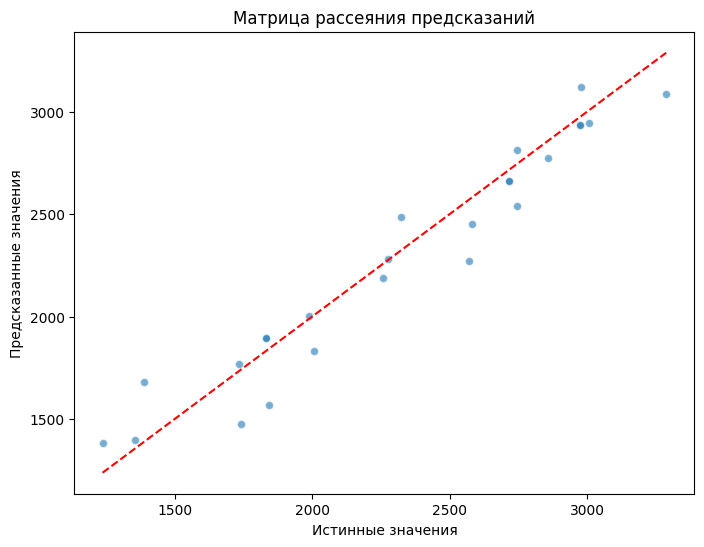

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, alpha=0.6, edgecolors='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Диагональ y = x')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Матрица рассеяния предсказаний')
plt.show()

# Модель без незначимых переменных

In [ ]:
x = df.drop(['price', 'weight','rearcam'], axis = 1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [ ]:
len(y_train)

128

In [ ]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     307.1
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.60e-94
Time:                        21:49:48   Log-Likelihood:                -1050.8
No. Observations:                 161   AIC:                             2124.
Df Residuals:                     150   BIC:                             2157.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1812.0449    172.054     10.532   

In [ ]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
len(x_train_st)

128

In [ ]:
model = LinearRegression()
results = model.fit(x_train_st, y_train)

In [ ]:
results = model.fit(x_train_st, y_train)
predictions_train = model.predict(x_train_st)

Обучающая выборка

In [ ]:
r2_score(y_train,predictions_train )
mse = mean_squared_error(y_train,predictions_train)
rmse = mean_squared_error(y_train,predictions_train, squared=False)
mae = mean_absolute_error(y_train,predictions_train)
mape = mean_absolute_percentage_error(y_train,predictions_train)
r2 = r2_score(y_train,predictions_train)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 28400.06211063801
Среднеквадратическая ошибка (RMSE): 168.52317974284134
Средняя абсолютная ошибка (MAE): 137.14923267012406
Средняя абсолютная ошибка  (MAPE): 0.073941077830843
Коэффициент детерминации (R^2): 0.9523678338011894


Тестовая выборка

In [ ]:
x_test_st = scaler.transform(x_test)
predictions_test = model.predict(x_test_st)
mse = mean_squared_error(y_test,predictions_test)
rmse = mean_squared_error(y_test,predictions_test, squared=False)
mae = mean_absolute_error(y_test,predictions_test)
mape = mean_absolute_percentage_error(y_test,predictions_test)
r2 = r2_score(y_test,predictions_test)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 24503.94648981734
Среднеквадратическая ошибка (RMSE): 156.5373645166461
Средняя абсолютная ошибка (MAE): 129.77428920372085
Средняя абсолютная ошибка  (MAPE): 0.05977289728310473
Коэффициент детерминации (R^2): 0.9530960429764027


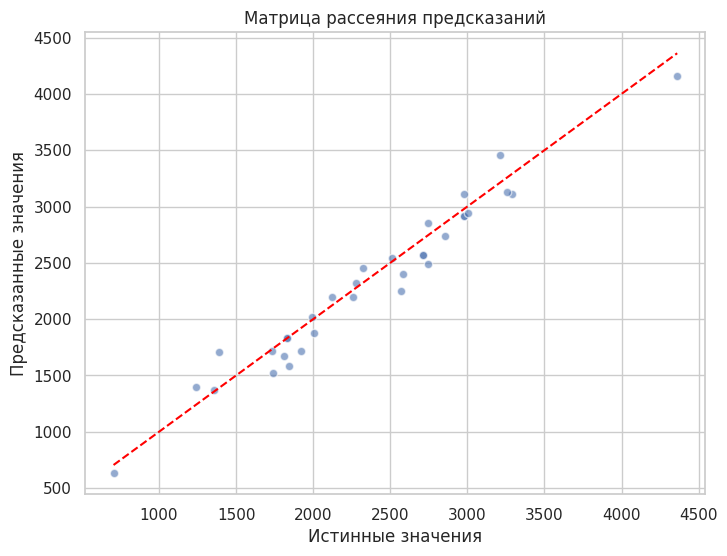

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, alpha=0.6, edgecolors='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Диагональ y = x')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Матрица рассеяния предсказаний')
plt.show()

# Полиномиальная модель

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
X_train_st = scaler.fit_transform(X_train)
model = LinearRegression()
reg = model.fit(X_train_st, y_train)
X_test_st = scaler.transform(X_test)
predictions_test = model.predict(X_test_st)


Обучающая выборка

In [ ]:
predictions_train = model.predict(X_train_st)
r2_score(y_train,predictions_train )
mse = mean_squared_error(y_train,predictions_train)
rmse = mean_squared_error(y_train,predictions_train, squared=False)
mae = mean_absolute_error(y_train,predictions_train)
mape = mean_absolute_percentage_error(y_train,predictions_train)
r2 = r2_score(y_train,predictions_train)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 2.1170188917331274e-20
Среднеквадратическая ошибка (RMSE): 1.454997900937705e-10
Средняя абсолютная ошибка (MAE): 1.0024159280419553e-10
Средняя абсолютная ошибка  (MAPE): 4.8365285210799073e-14
Коэффициент детерминации (R^2): 1.0


Тестовая выборка

In [ ]:
mse = mean_squared_error(y_test,predictions_test)
rmse = mean_squared_error(y_test,predictions_test, squared=False)
mae = mean_absolute_error(y_test,predictions_test)
mape = mean_absolute_percentage_error(y_test,predictions_test)
r2 = r2_score(y_test,predictions_test)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 415289.6130292607
Среднеквадратическая ошибка (RMSE): 644.4296804378743
Средняя абсолютная ошибка (MAE): 281.84102942145887
Средняя абсолютная ошибка  (MAPE): 0.15450220631718845
Коэффициент детерминации (R^2): 0.26742344474849367


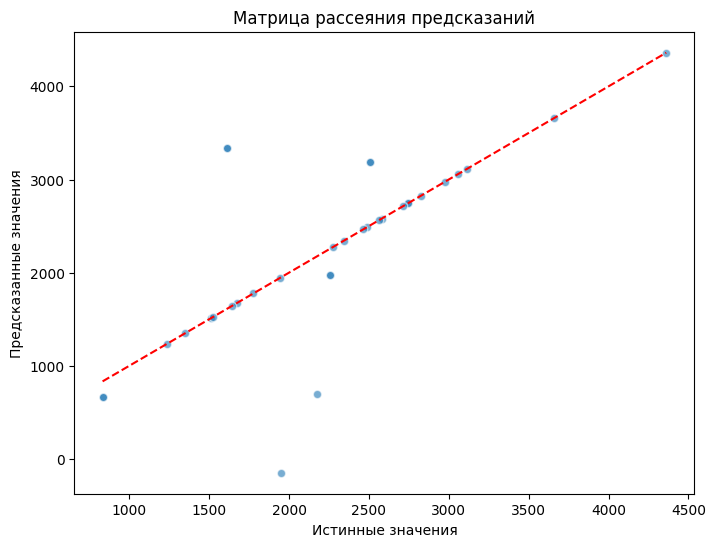

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, alpha=0.6, edgecolors='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Диагональ y = x')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Матрица рассеяния предсказаний')
plt.show()

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(reg, X_train_st)
shap_values = explainer(X_test_st)

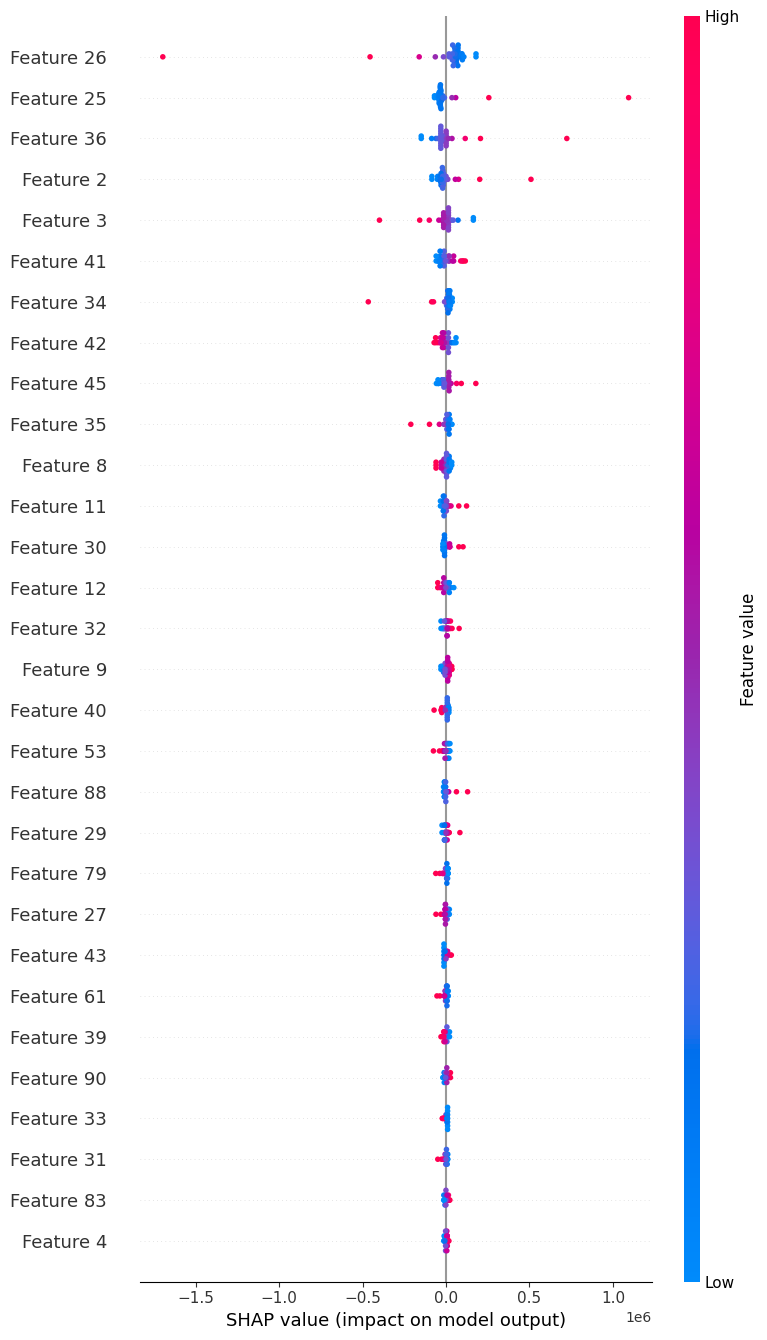

In [ ]:
shap.summary_plot(shap_values, X_test_st, max_display=30)

In [ ]:
[26,25,36,2,3,41,34, 42,45,35,8,11,30,12,32,9,40,53,88]

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
indices_to_keep = [26,25,36,2,3,41,34, 42,45,35,8,11,30,12,32,9,40,53,88]
X_poly_selected = X_poly[:, indices_to_keep]
X_train, X_test, y_train, y_test = train_test_split(X_poly_selected, y, test_size=0.2, random_state=42)
X_train_st = scaler.fit_transform(X_train)
model = LinearRegression()
reg = model.fit(X_train_st, y_train)
X_test_st = scaler.transform(X_test)
predictions_test = model.predict(X_test_st)

In [ ]:
predictions_train = model.predict(X_train_st)
r2_score(y_train,predictions_train )
mse = mean_squared_error(y_train,predictions_train)
rmse = mean_squared_error(y_train,predictions_train, squared=False)
mae = mean_absolute_error(y_train,predictions_train)
mape = mean_absolute_percentage_error(y_train,predictions_train)
r2 = r2_score(y_train,predictions_train)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 30454.708952807327
Среднеквадратическая ошибка (RMSE): 174.51277590138588
Средняя абсолютная ошибка (MAE): 134.29567407388703
Средняя абсолютная ошибка  (MAPE): 0.06578970274235943
Коэффициент детерминации (R^2): 0.9484856266104311


In [ ]:
mse = mean_squared_error(y_test,predictions_test)
rmse = mean_squared_error(y_test,predictions_test, squared=False)
mae = mean_absolute_error(y_test,predictions_test)
mape = mean_absolute_percentage_error(y_test,predictions_test)
r2 = r2_score(y_test,predictions_test)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 32044.281325861608
Среднеквадратическая ошибка (RMSE): 179.00916548004352
Средняя абсолютная ошибка (MAE): 151.4115387032286
Средняя абсолютная ошибка  (MAPE): 0.07333848054503667
Коэффициент детерминации (R^2): 0.9434734496295821


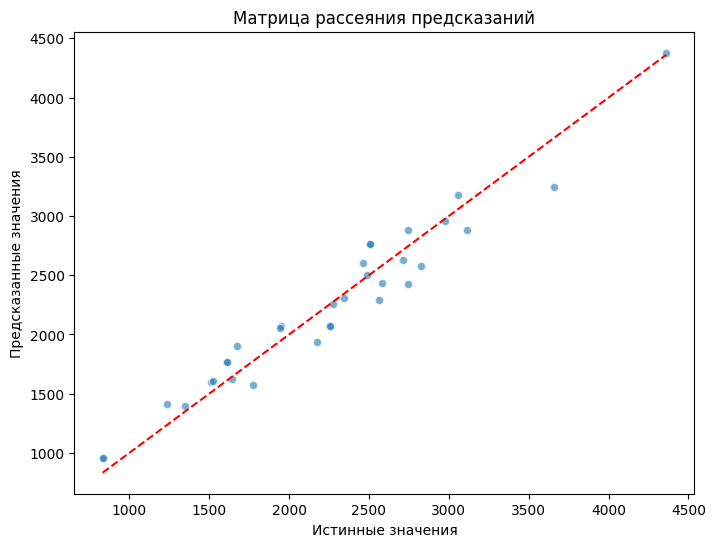

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, alpha=0.6, edgecolors='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Диагональ y = x')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Матрица рассеяния предсказаний')
plt.show()

# Визуальный анализ связей

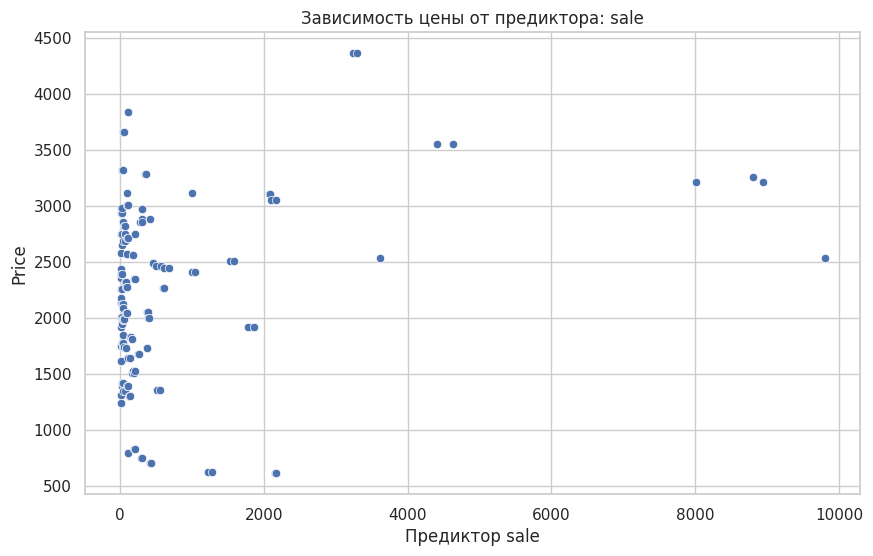

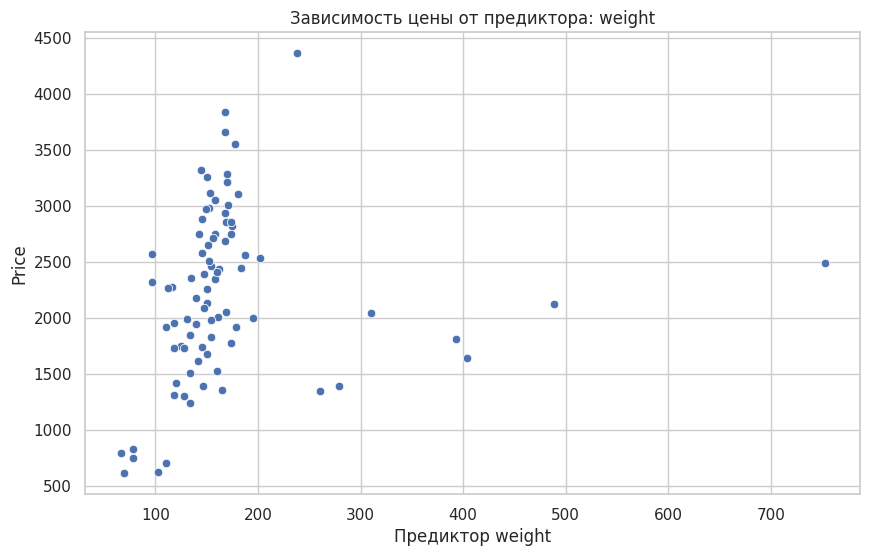

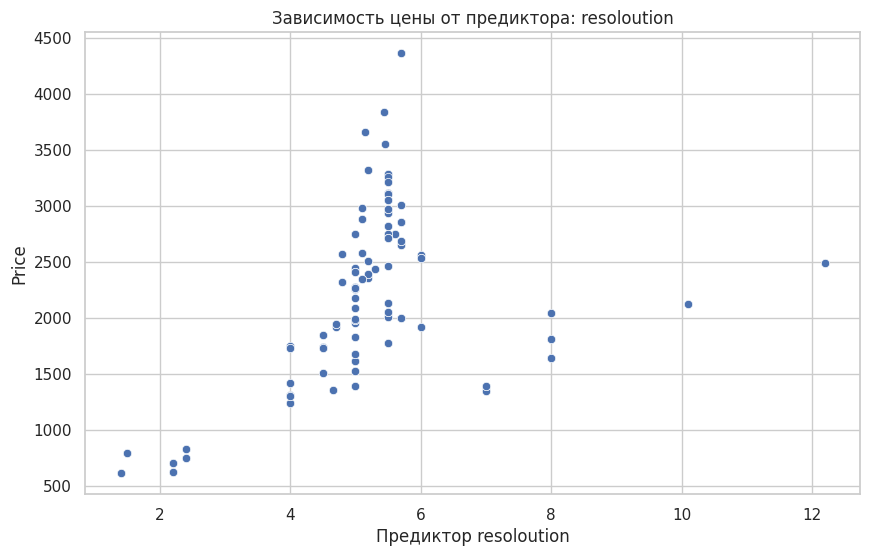

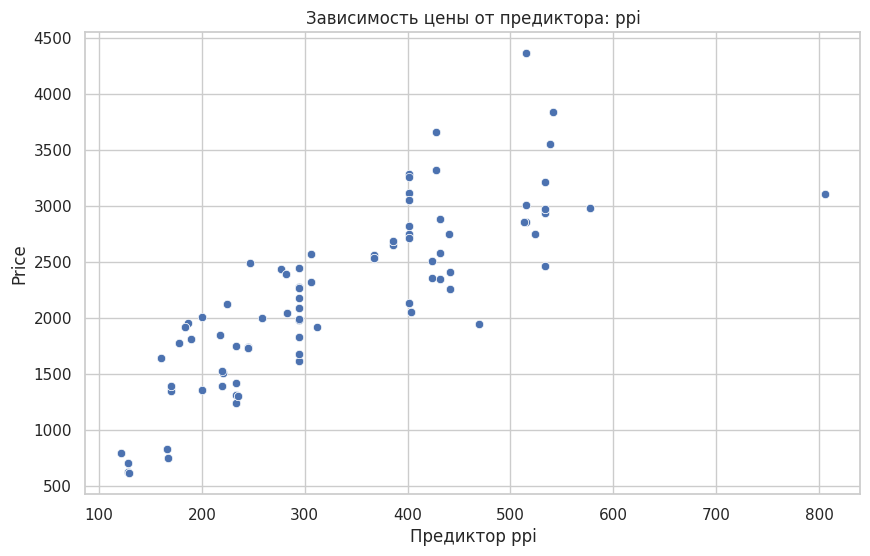

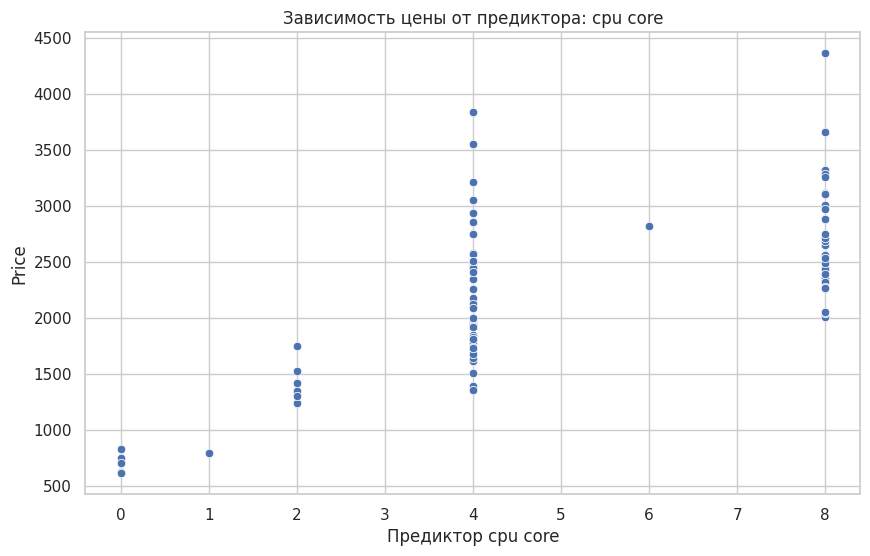

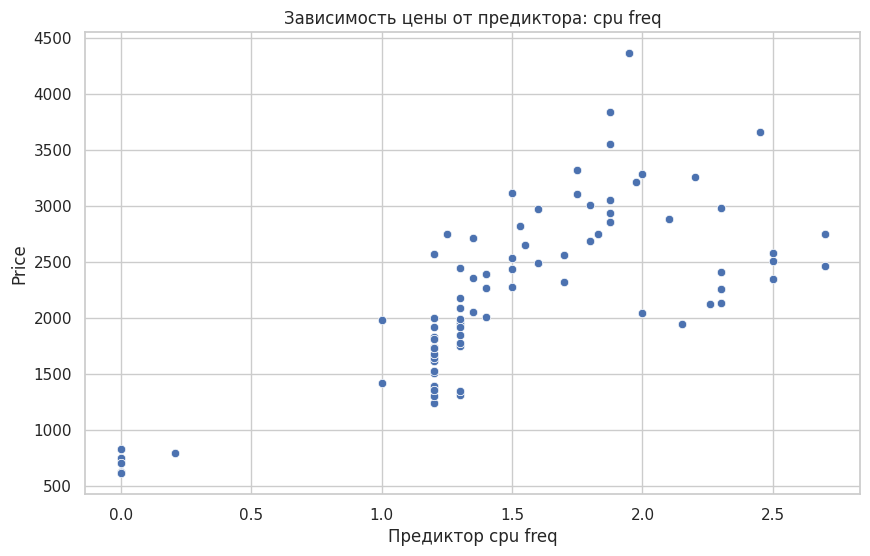

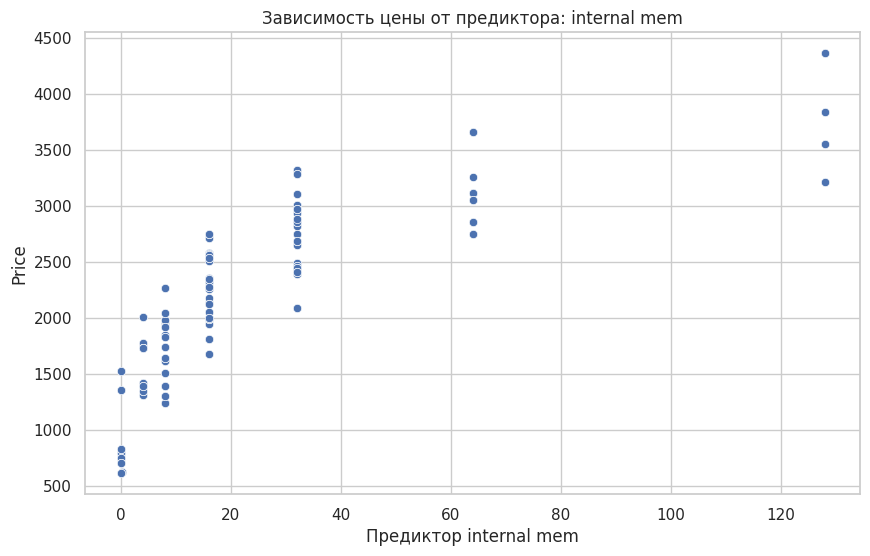

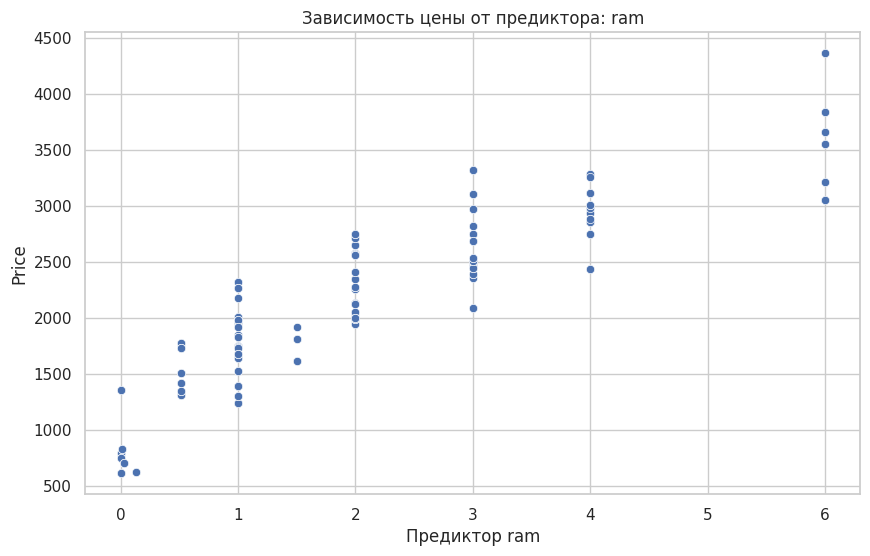

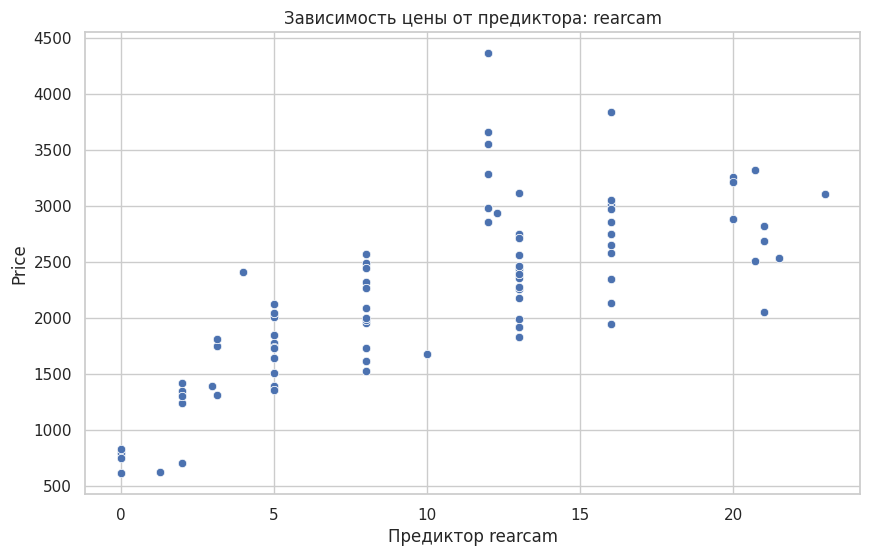

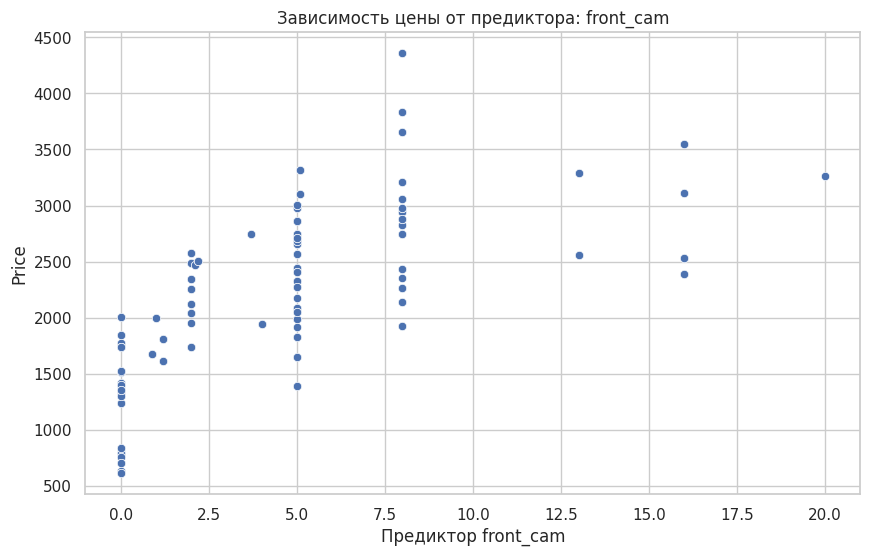

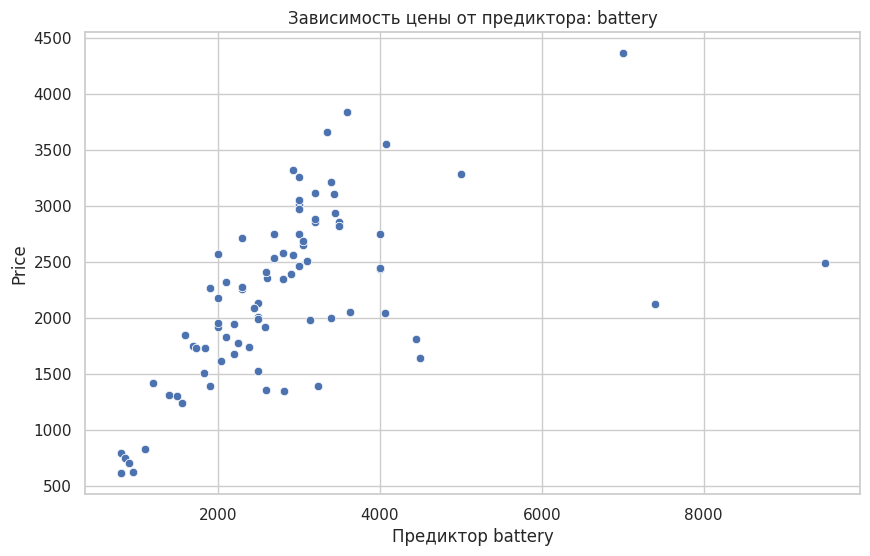

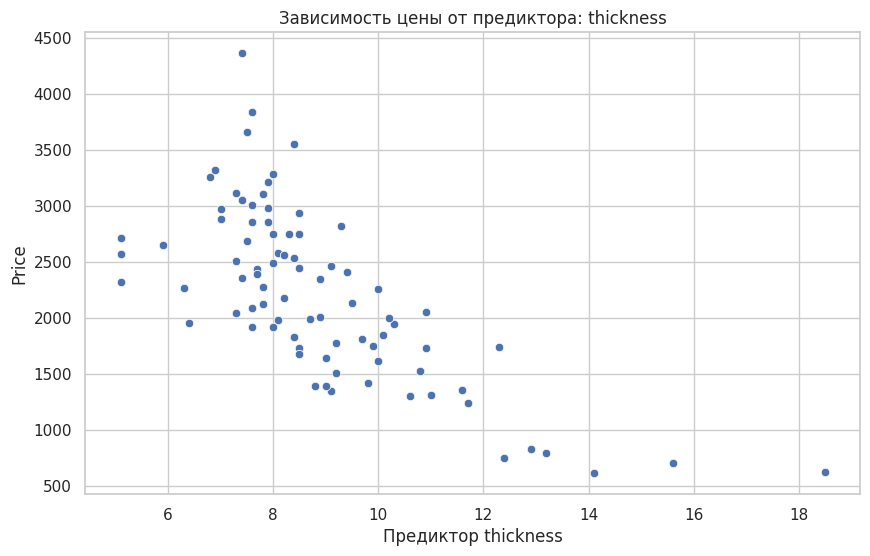

In [ ]:
sns.set(style="whitegrid")

for column in x.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x[column], y=df['price'])
    plt.title(f'Зависимость цены от предиктора: {column}')
    plt.xlabel(f'Предиктор {column}')
    plt.ylabel('Price')
    plt.show()

In [ ]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [ ]:
x.columns

Index(['sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'rearcam', 'front_cam', 'battery', 'thickness'],
      dtype='object')

In [ ]:
x['ln_ppi'] = np.log(df[['ppi']])
x = x.drop('ppi', axis = 1)
x['cpu core^2'] = x['cpu core']
x['internal mem^2'] = x['internal mem']
x['battery^2'] = x['battery']
x = x.drop('rearcam', axis =1)
x = x.drop('front_cam', axis =1)
x = x.drop('sale', axis =1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

Кластеры для веса

In [ ]:
# Применение K-means кластеризации на обучающих данных
kmeans = KMeans(n_clusters=2)
df_train2 = pd.DataFrame({'weight': x_train['weight'], 'price': y_train})
df_train2['cluster'] = kmeans.fit_predict(df_train2[['weight', 'price']])
df_train2 = pd.get_dummies(df_train2, columns=['cluster'], drop_first=True, dtype=int)
df_train2['наклон'] = df_train2['cluster_1'] * df_train2['weight']
x_train['cluster_weight'] = df_train2['cluster_1']
x_train['weight*cl']= df_train2['наклон']
x_train = x_train.drop('weight', axis=1)
# Применение K-means кластеризации на тестовых данных
df_test2 = pd.DataFrame({'weight': x_test['weight'], 'price': y_test})
df_test2['cluster'] = kmeans.predict(df_test2[['weight', 'price']])
df_test2 = pd.get_dummies(df_test2, columns=['cluster'], drop_first=True, dtype=int)
df_test2['наклон'] = df_test2['cluster_1'] * df_test2['weight']
x_test['cluster_weight'] = df_test2['cluster_1']
x_test['weight*cl']= df_test2['наклон']
x_test = x_test.drop('weight', axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Кластеры для величины экрана

In [ ]:
# Применение K-means кластеризации на обучающих данных
kmeans = KMeans(n_clusters=2)
df_train3 = pd.DataFrame({'resoloution': x_train['resoloution'], 'price': y_train})
df_train3['cluster'] = kmeans.fit_predict(df_train3[['resoloution', 'price']])
df_train3 = pd.get_dummies(df_train3, columns=['cluster'], drop_first=True, dtype=int)
df_train3['наклон'] = df_train3['cluster_1'] * df_train3['resoloution']
x_train['cluster_resoloution'] = df_train3['cluster_1']
x_train['resoloution*cl']= df_train3['наклон']

# Применение K-means кластеризации на тестовых данных
df_test3 = pd.DataFrame({'resoloution': x_test['resoloution'], 'price': y_test})
df_test3['cluster'] = kmeans.predict(df_test3[['resoloution', 'price']])
df_test3 = pd.get_dummies(df_test3, columns=['cluster'], drop_first=True, dtype=int)
df_test3['наклон'] = df_test3['cluster_1'] * df_test3['resoloution']
x_test['cluster_resoloution'] = df_test3['cluster_1']
x_test['resoloution*cl']= df_test3['наклон']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)


In [ ]:
model = LinearRegression()
results = model.fit(x_train_st, y_train)

In [ ]:
results = model.fit(x_train_st, y_train)
predictions_train = model.predict(x_train_st)

In [ ]:
r2_score(y_train,predictions_train )
mse = mean_squared_error(y_train,predictions_train)
rmse = mean_squared_error(y_train,predictions_train, squared=False)
mae = mean_absolute_error(y_train,predictions_train)
mape = mean_absolute_percentage_error(y_train,predictions_train)
r2 = r2_score(y_train,predictions_train)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 27041.12917254547
Среднеквадратическая ошибка (RMSE): 164.44187171321502
Средняя абсолютная ошибка (MAE): 135.09221393942676
Средняя абсолютная ошибка  (MAPE): 0.069660222750876
Коэффициент детерминации (R^2): 0.9546470161250906


In [ ]:
x_test_st = scaler.transform(x_test)
predictions_test = model.predict(x_test_st)
mse = mean_squared_error(y_test,predictions_test)
rmse = mean_squared_error(y_test,predictions_test, squared=False)
mae = mean_absolute_error(y_test,predictions_test)
mape = mean_absolute_percentage_error(y_test,predictions_test)
r2 = r2_score(y_test,predictions_test)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 25668.822205904813
Среднеквадратическая ошибка (RMSE): 160.21492504103608
Средняя абсолютная ошибка (MAE): 134.8875119765502
Средняя абсолютная ошибка  (MAPE): 0.06156032683337338
Коэффициент детерминации (R^2): 0.9508663090619941


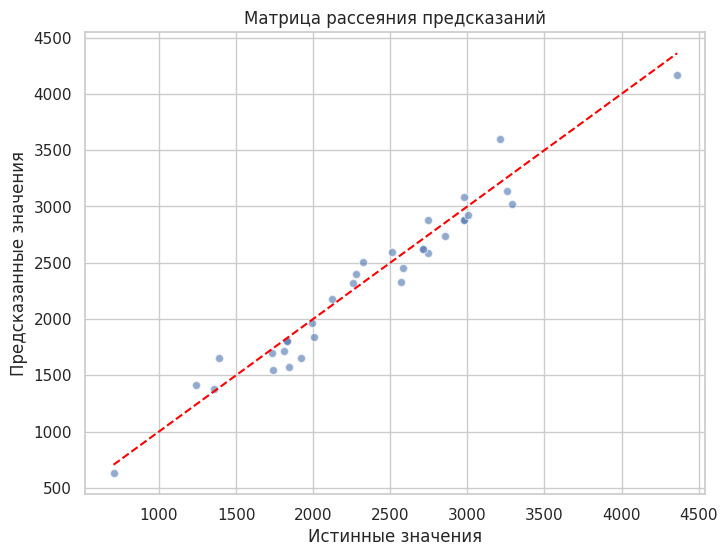

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, alpha=0.6, edgecolors='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Диагональ y = x')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Матрица рассеяния предсказаний')
plt.show()

In [ ]:
x_test.columns

Index(['sale', 'resoloution', 'cpu core', 'cpu freq', 'internal mem', 'ram',
       'battery', 'thickness', 'ln_ppi', 'cpu core^2', 'internal mem^2',
       'battery^2', 'cluster_weight', 'weight*cl', 'cluster_resoloution',
       'resoloution*cl'],
      dtype='object')

In [ ]:
reg = LinearRegression().fit(x_train, y_train)
explainer = shap.Explainer(reg, x_train)
shap_values = explainer(x_test)

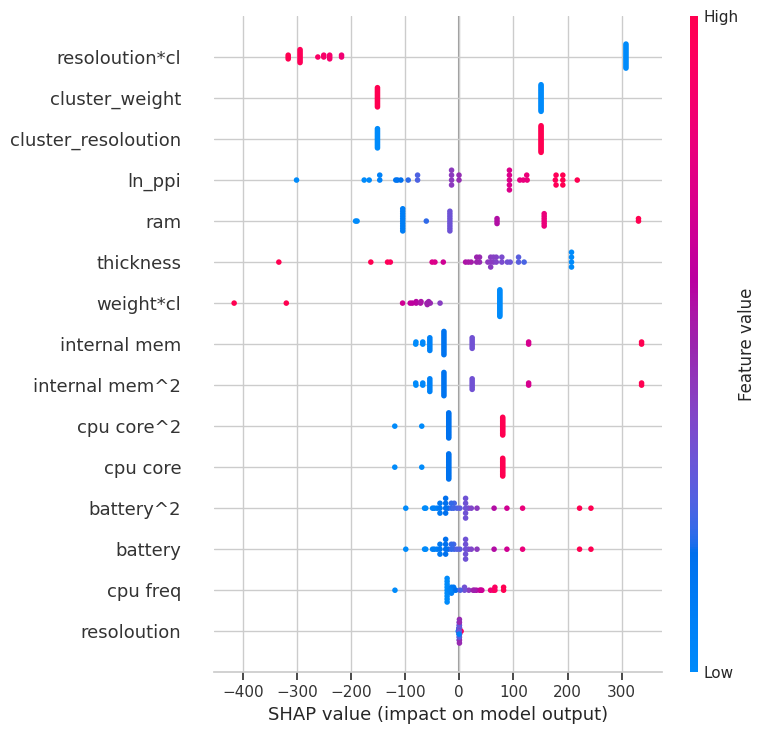

In [ ]:
shap.summary_plot(shap_values, x_test, max_display=40)

In [ ]:
# Применение K-means кластеризации
kmeans = KMeans(n_clusters=2)  # Укажите желаемое количество кластеров
df2 = df[['sale', 'price']].copy()
df2['cluster'] = kmeans.fit_predict(df[['sale', 'price']])
# Преобразование кластеров в индикаторы
df2 = pd.get_dummies(df2, columns=['cluster'], drop_first=True, dtype=int)
df2['наклон'] = df2['cluster_1']* df['sale']
# Добавление постоянного члена и включение кластеров в модель
x = sm.add_constant(df2[['cluster_1']])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     26.11
Date:                Thu, 02 May 2024   Prob (F-statistic):           9.14e-07
Time:                        19:29:11   Log-Likelihood:                -1285.4
No. Observations:                 161   AIC:                             2575.
Df Residuals:                     159   BIC:                             2581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2145.6118     57.928     37.039      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters=2)  # Укажите желаемое количество кластеров
df3 = df[['resoloution']].copy()
df3['cluster'] = kmeans.fit_predict(df[['resoloution', 'price']])
# Преобразование кластеров в индикаторы
df3 = pd.get_dummies(df3, columns=['cluster'], drop_first=True, dtype=int)
df3['наклон'] = df3['cluster_1']* df3['resoloution']
# Добавление постоянного члена и включение кластеров в модель
x = sm.add_constant(df3[['resoloution', 'cluster_1', 'наклон']])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     143.9
Date:                Thu, 02 May 2024   Prob (F-statistic):           7.55e-45
Time:                        19:17:54   Log-Likelihood:                -1191.2
No. Observations:                 161   AIC:                             2390.
Df Residuals:                     157   BIC:                             2403.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         741.4735    131.678      5.631      

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters=2)  # Укажите желаемое количество кластеров
df4 = df[['weight']].copy()
df4['cluster'] = kmeans.fit_predict(df[['weight', 'price']])
# Преобразование кластеров в индикаторы
df4 = pd.get_dummies(df4, columns=['cluster'], drop_first=True, dtype=int)
df4['наклон'] = df4['cluster_1']* df4['weight']
# Добавление постоянного члена и включение кластеров в модель
x = sm.add_constant(df4[['weight', 'cluster_1', 'наклон']])
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     112.1
Date:                Thu, 02 May 2024   Prob (F-statistic):           7.68e-39
Time:                        19:41:27   Log-Likelihood:                -1205.5
No. Observations:                 161   AIC:                             2419.
Df Residuals:                     157   BIC:                             2431.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2800.6226    100.404     27.893      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
